In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
books = pd.read_csv('../../data/Books.csv', delimiter=';')
ratings = pd.read_csv('../../data/Ratings.csv', delimiter=';')
users = pd.read_csv('../../data/Users.csv', delimiter=';')

C:\Users\Никита\AppData\Local\Temp\ipykernel_12468\3431067428.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  users = pd.read_csv('../../data/Users.csv', delimiter=';')


In [3]:
books.shape, ratings.shape, users.shape

((271379, 5), (1149780, 3), (278859, 2))

In [4]:
books.head(2)

,ISBN,Title,Author,Year,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


In [5]:
ratings.head(2)

,User-ID,ISBN,Rating
0,276725,034545104X,0
1,276726,0155061224,5


In [6]:
users.head(2)

,User-ID,Age
0,1,NaN
1,2,18


## Books EDA

In [7]:
books['Title'].value_counts()  # The number of unique titles is les

Title
Selected Poems                                                                                                                    27
Little Women                                                                                                                      24
Wuthering Heights                                                                                                                 21
The Secret Garden                                                                                                                 20
Dracula                                                                                                                           20
                                                                                                                                  ..
Cinderella'S Secret Agent (A Year Of Loving Dangerously) (Silhouette Intimate Moments, No 1076)                                    1
Diamond In The Rough (Temptation , No 688)                     

In [8]:
books['Author'].value_counts()

Author
Agatha Christie        632
William Shakespeare    567
Stephen King           524
Ann M. Martin          423
Francine Pascal        373
                      ... 
Jean Cassels             1
Bernice Meyers           1
Mark A. Taylor           1
Ellery R. Sheets         1
Christopher  Biffle      1
Name: count, Length: 102029, dtype: int64

In [9]:
books['Publisher'].value_counts()

Publisher
Harlequin              7536
Silhouette             4220
Pocket                 3905
Ballantine Books       3783
Bantam Books           3647
                       ... 
Book Essentials           1
Permeable Press           1
Park Slope Pr             1
J. David Publishers       1
Connaught                 1
Name: count, Length: 16910, dtype: int64

In [10]:
users['Age'].isna().sum()

110232

In [11]:
def parse_age(age):
    try:
        int_age = int(age)
        if int_age < 5 or int_age > 100:
            return np.nan
        return int_age
    except:
        return np.nan

<Axes: >

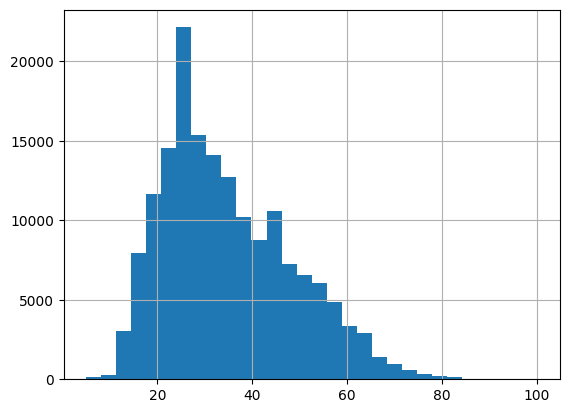

In [12]:
users['Age'].apply(parse_age).hist(bins=30)

In [13]:
users['Age'].unique()

array([nan, '18', '17', '61', '26', '14', '25', '19', '46', '55', '32',
       '24', '20', '34', '23', '51', '31', '21', '44', '30', '57', '43',
       '37', '41', '54', '42', '50', '39', '53', '47', '36', '28', '35',
       '13', '58', '49', '38', '45', '62', '63', '27', '33', '29', '66',
       '40', '15', '60', '0', '79', '22', '16', '65', '59', '48', '72',
       '56', '67', '1', '80', '52', '69', ' canada', '71', ' usa', '73',
       ' chile', '78', '9', '64', '103', '104', '12', '74', ' egypt',
       '75', '231', ' united kingdom', '3', '76', ' the', ' spain', '83',
       '68', ' austria', '119', '11', ' pakistan', '2', ' india', '70',
       '77', '93', ' mexico', ' costa rica', ' yugoslavia', ' honduras',
       ' netherlands', ' new zealand', '8', '7', ' city', ' bas rhin',
       ' australia', '4', '81', '114', '230', '239', ' italy', '10',
       ' germany', '5', ' panama', '148', ' china', ' british columbia',
       '151', '6', ' south africa', '101', ' afghanistan', '20

In [15]:
users.count()

User-ID        278859
Age            168627
Age_numeric    167151
dtype: int64

In [14]:
users['Age_numeric'] = pd.to_numeric(users['Age'], errors='coerce')
users['Age_numeric'].isna().sum()

111708

In [16]:
users['Age_numeric'].value_counts()

Age_numeric
24.0     5651
25.0     5594
26.0     5525
23.0     5433
27.0     5361
         ... 
110.0       1
128.0       1
244.0       1
226.0       1
127.0       1
Name: count, Length: 164, dtype: int64

In [22]:
users['Age_Group'] = pd.cut(users['Age'], bins=[0, 18, 25, 35, 45, 55, 65, 100], labels=['18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+'])
age_rating = users.groupby('Age_Group')['Book-Rating'].mean()
age_rating.plot(kind='bar', color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Average Rating')
plt.title('Average Book Rating by Age Group')
plt.show()

TypeError: '<' not supported between instances of 'float' and 'str'